### Name: Jeremy John R. Orlina
### Instructor: Egnr. Roman M. Richard



###Intended Learning Outcome

1. Perform descriptive and correlation analysis to to analyze the dataset.
2. Interpret the results of descriptive and correlation analysis
###Resources

- Personal Computer
- Jupyter Notebook
- Internet Connection
###Instruction

1. Gather a dataset regarding your identified problem for the ASEAN Data Science Explorer. Make sure that the dataset includes multiple variables.
- https://ourworldindata.org/population-growth
2. Load the dataset into pandas dataframe.
3. Prepare the data by applying appropriate data preprocessing techniques.
4. Analyze the data using descriptive analysis.
4. Perform correlation analysis.
5. Interpret the results based on the descriptive and correlation analysis.
6. Submit the PDF file.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pop = pd.read_csv('/content/population-and-demography.csv')
pop.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

In [5]:
# keeps only these data
newPop = pd.concat([
    pop.iloc[:, 0], # country name
    pop.iloc[:, 1], # year
    pop.iloc[:, 2], # Total population
    pop.iloc[:, 7], # Population aged 15 to 64
], axis = 1)
newPop

,Country name,Year,Population,Population aged 15 to 64 years
0,Afghanistan,1950,7480464,4198587
1,Afghanistan,1951,7571542,4250002
2,Afghanistan,1952,7667534,4303436
3,Afghanistan,1953,7764549,4356242
4,Afghanistan,1954,7864289,4408474
...,...,...,...,...
18283,Zimbabwe,2017,14751101,8056253
18284,Zimbabwe,2018,15052191,8264833
18285,Zimbabwe,2019,15354606,8473475
18286,Zimbabwe,2020,15669663,8691594


In [8]:
# Checks for duplicates
newPop.duplicated().sum()

0

In [26]:
# Create a list of Southeast Asian countries.
SEA_List =  ['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Thailand',
              'Philippines', 'Singapore', 'Brunei', 'Vietnam', 'Korea']

In [27]:
SEA = newPop[newPop['Country name'].isin(SEA_List)]
SEA.set_index('Country name', inplace = True)
SEA

,Year,Population,Population aged 15 to 64 years
Country name,,,
Brunei,1950,48290,28162
Brunei,1951,51113,29597
Brunei,1952,54038,30824
Brunei,1953,57195,32155
Brunei,1954,60608,33587
...,...,...,...
Vietnam,2017,94033050,65217930
Vietnam,2018,94914330,65704216
Vietnam,2019,95776710,66150520


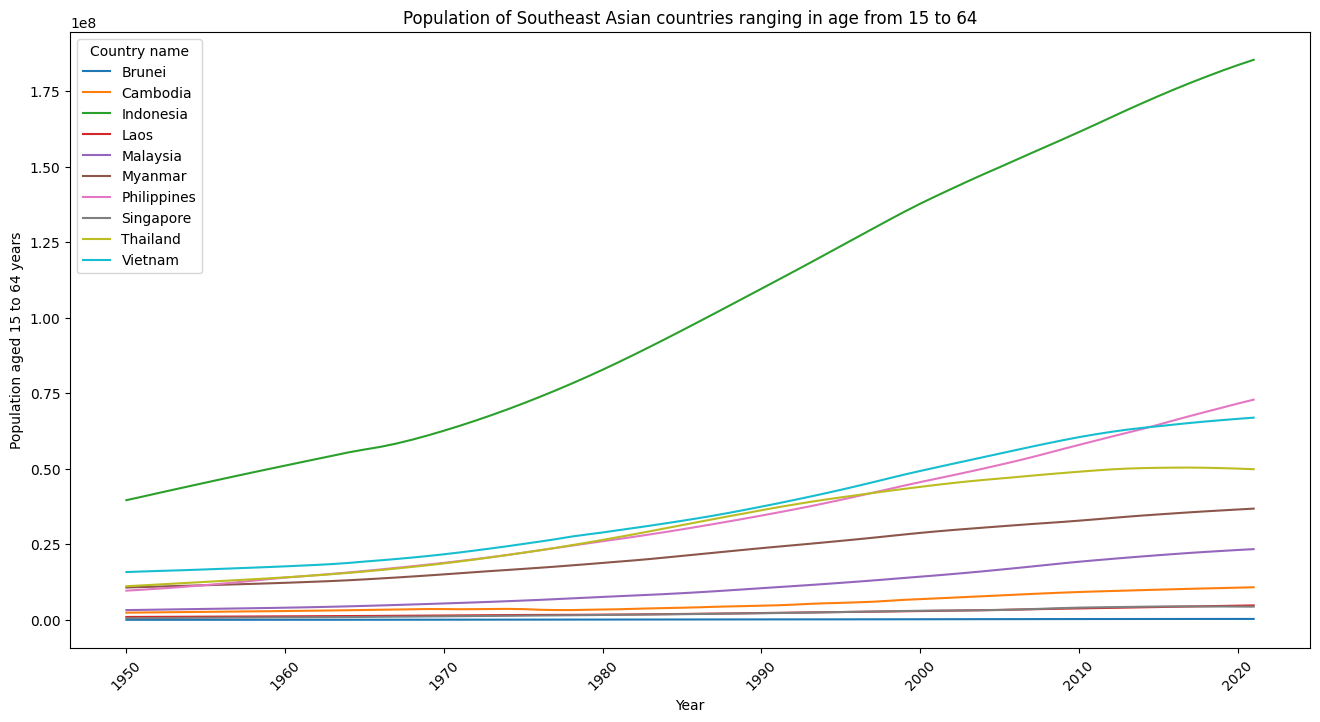

In [28]:
# plotting the population of Southeast Asian countries ranging in age from 15 to 64
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Population aged 15 to 64 years', hue='Country name', data=SEA)
plt.xticks(rotation=45)
plt.title('Population of Southeast Asian countries ranging in age from 15 to 64')
plt.xlabel('Year')
plt.ylabel('Population aged 15 to 64 years')
plt.show()